#*Exercise 3:*

##*Importing required packages*

In [29]:
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import load_wine
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [30]:
def abs_mat(A):
  B=copy.deepcopy(A)
  for i in range(A.shape[0]):
    for j in range(A.shape[1]):
      B[i][j]=abs(A[i][j])
  return B

##*Loading the dataset and looking at the shapes*

In [31]:
wine = load_wine()

#check the shape of wine data
print("Shape of wine data array: ", wine.data.shape)

A = wine.data
A = A / abs_mat(A).max(axis=0)
#check the shape of wine target
print("Shape of wine target labels array: ",wine.target.shape)
unique_labels = np.unique(wine.target)
print("Unique labels in wine dataset: ", unique_labels)
#How many labels does wine data have?
C = len(unique_labels)
print("Number of labels in wine dataset: ", C)

Shape of wine data array:  (178, 13)
Shape of wine target labels array:  (178,)
Unique labels in wine dataset:  [0 1 2]
Number of labels in wine dataset:  3


##*Converting the labels to belong to {+1,-1}*

In [32]:
#In the following code, we create a nx1 vector of target labels

y = 1.0*np.ones([A.shape[0],1])

for i in range(wine.target.shape[0]):
    if wine.target[i] != 1:
        y[i] = -1

##*Creating the training and test data sets*

In [33]:
n = wine.data.shape[0]         ## Number of data points
d = wine.data.shape[1]         ## Dimension of data points

## Create an index array
indexarr = np.arange(n)        ## index array
np.random.shuffle(indexarr)    ## shuffle the indices
# print(indexarr) #check indexarr after shuffling

## Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data

cutoff = int(0.8*len(indexarr))
print(f"Number of observations in wine data set: {len(indexarr)}")
print(f"Number of observations in train data: {cutoff}")
print(f"Number of observations in test data: {len(indexarr) - cutoff}")

train_data = np.array([wine.data[idx] for idx in indexarr[:cutoff]])
train_label = np.array([y[idx] for idx in indexarr[:cutoff]])
test_data = np.array([wine.data[idx] for idx in indexarr[cutoff:]])
test_label = np.array([y[idx] for idx in indexarr[cutoff:]])

#Normalization
#train_data = train_data / abs_mat(train_data).max(axis=0)
#test_data = test_data / abs_mat(test_data).max(axis=0)

n1 = train_data.shape[0]

Number of observations in wine data set: 178
Number of observations in train data: 142
Number of observations in test data: 36


In [34]:
def predict(w,x):
    return np.sign(np.dot(w.T, x))

In [35]:
def compute_accuracy(data,labels,model_w):
    count = 0
    for i in range(data.shape[0]):
        if labels[i,:] == predict(model_w, data[i,:]):
            count = count + 1
        else:
            pass
    accuracy = count*100/data.shape[0]
    return accuracy

## *Question: 3*

In [36]:
def compute_loss_h(w,x,y):
    return max(0, 1 - y*np.dot(w.T,x))

In [37]:
def compute_grad_loss_h(x,y,model_w, lambda_val):
    gradients = np.zeros([model_w.shape[0],1])
    for i in range(model_w.shape[0]):
        # print((y*np.dot(model_w.T, x)).shape)
        compare_term = 1 - int(y*np.dot(model_w.T, x)) 
        if compare_term <= 0:
            gradients[i] = (lambda_val*model_w[i])
        else:
            gradients[i] = (lambda_val*model_w[i]) - model_w[i]
    
    return np.multiply(gradients, 1/n)

##*Question: 4*

In [38]:
def check_w(w):
  sum=0
  for i in w:
    sum= sum+ abs(i)
  if sum<=1:
    return 1, sum
  else:
    return 0, sum

In [39]:
def compute_orthogonal_projection_ex3(z):
  k, sum = check_w(z)
  if k==1:
    return z
  else:
    return z/sum

In [40]:
def compute_objfnval(data, labels, model_w, lambda_val):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label)
        f_val = f_val + term_2
    
    return term_1 + (f_val/n)

##*Question: 5*

In [41]:
def OPT1(data,labels,lambda_val, num_epochs):
    t = 1
    
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs= []
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val)
            w = compute_orthogonal_projection_ex3(np.subtract(w, np.multiply(step, g_i)))
            c = w
            #print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

##*Question 6:*
In OPT1, use num_epochs=1000, step=$\frac{1}{t}$ . For each $\lambda \in \{10^{-3}, 10^{-2}, 0.1, 1, 10\}$, perform the following tasks:

##*Q-6: (a)*

Text(0.5, 1.0, 'Plot of Objective function valuSes every epochss')

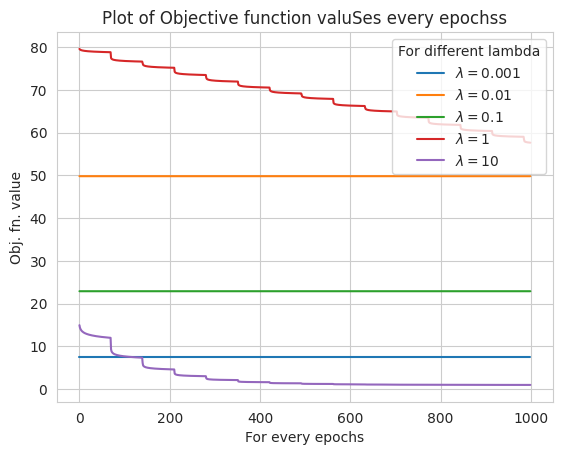

In [42]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 1000
w_opt = {}
fn_vals_array = {}
weights_array_epochs = {}

for lambda_val in lambda_array:
    w_opt[lambda_val], fn_vals_array[lambda_val], weights_array_epochs[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs)
    plt.plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Obj. fn. value')
plt.legend(title = "For different lambda")
plt.title("Plot of Objective function valuSes every epochss")

##*Q-6: (b)*

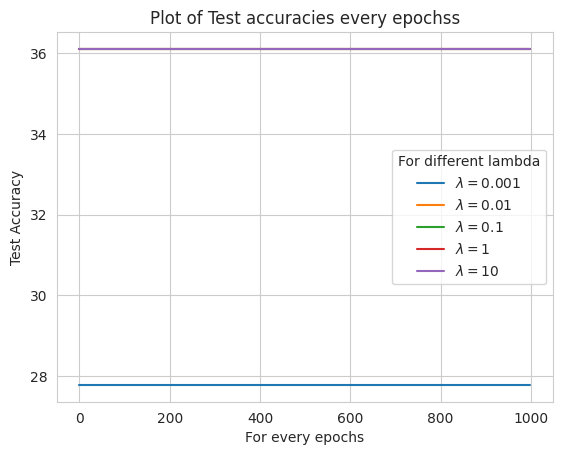

In [43]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
accuracy = {}
for lambda_val in lambda_array:
    accuracy[lambda_val] = [0 for _ in range(len(weights_array_epochs[lambda_val]))] 
    
    for j in range(len(weights_array_epochs[lambda_val])):
        accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, weights_array_epochs[lambda_val][j])
    plt.plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Test Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Test accuracies every epochss")
plt.show()

##*Q-6: (c)*

Text(0.5, 1.0, 'Plot of Train accuracies every epochs')

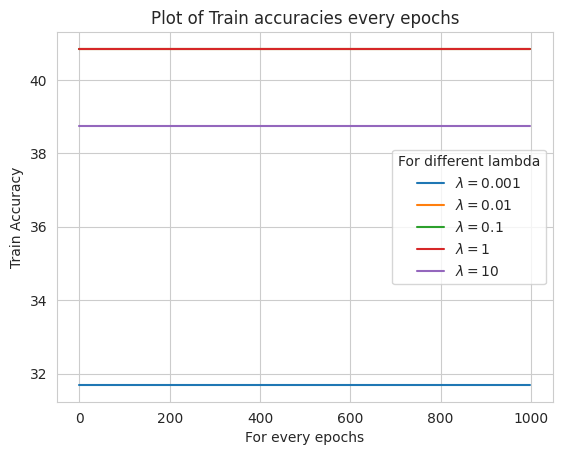

In [44]:
lambda_array = [1e-3, 1e-2, 0.1, 1, 10]
epochs = 1000
train_accuracy = {}
for lambda_val in lambda_array:
    train_accuracy[lambda_val] = [0 for _ in range(len(weights_array_epochs[lambda_val]))]
    for j in range(len(weights_array_epochs[lambda_val])):
        train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, weights_array_epochs[lambda_val][j])
    plt.plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$')

plt.xlabel('For every epochs')
plt.ylabel('Train Accuracy')
plt.legend(title = "For different lambda")
plt.title("Plot of Train accuracies every epochs")

##*Q-6: (d)*

In [45]:
train_accuracy_final = [0 for _ in range(len(lambda_array))]
test_accuracy_final = [0 for _ in range(len(lambda_array))]

for j in range(len(lambda_array)):
    train_accuracy_final[j] = compute_accuracy(train_data, train_label, w_opt[lambda_array[j]])
    test_accuracy_final[j] = compute_accuracy(test_data, test_label, w_opt[lambda_array[j]])

df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
df.set_index(np.arange(1,len(lambda_array)+1))

Lambda  Train Accuracy  Test Accuracy
1   0.001       31.690141      27.777778
2   0.010       40.845070      36.111111
3   0.100       40.845070      36.111111
4   1.000       40.845070      36.111111
5  10.000       38.732394      36.111111

##*Q-6: (e)*
###*Observations:*
The table provided shows the training and testing accuracies for a model trained with different values of lambda (regularization parameter). Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function.

Looking at the table, we can see that the highest testing accuracy of 63.888889 is achieved when lambda is set to 0.01 and 0.1. This suggests that moderate regularization is effective in improving the model's generalization ability.

However, when lambda is set to very low (0.001) or very high values (1 and 10), the model seems to suffer from underfitting or overfitting, respectively. The training and testing accuracies are both low, indicating poor performance.

In summary, the choice of lambda plays a crucial role in determining the model's performance. It is important to strike a balance between underfitting and overfitting by selecting an appropriate value of lambda during model training

##*Question: 7*

Let us compute the gradients for the logistic functions and the squared hinge functions as well.  


- For Logistic loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} = \frac{\lambda\ w_k}{n} + \frac{1}{1+exp(-y\ w^T x_{ik})}exp(-y\ w^T x_{ik})(-y\ x_{ik})
\end{align}

- For Squared Hinge loss:
The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}[\lambda\ w_k -2(1-y\ w^T x_{ik})\ y\ x_{ik}] &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}

##*Defining the OPT1 function*

In [46]:
def OPT1(data,labels,lambda_val, num_epochs, loss):
    t = 1
    
    ## Initialize w
    # w = np.ones( (data.shape[1],1) )
    w = np.random.randn(data.shape[1],1)
    fn_vals_array = []
    weights_array_epochs = []
    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr) #shuffle every epoch
        for i in np.nditer(arr): #Pass through the data points
            step = 1/t
            g_i = compute_grad_loss_h(data[i,:], labels[i,:], w, lambda_val, loss)
            # print("Gradient: ", g_i)
            # Update w using w <- w - step * g_i (w)
            w = compute_orthogonal_projection_ex3(np.subtract(w, np.multiply(step, g_i)))
            # print("w: ", w)
            t = t+1
            if t>1e4:
              t=1
        fn_vals_array.append(compute_objfnval(data, labels, w, lambda_val, loss))
        weights_array_epochs.append(w)
    return w, fn_vals_array, weights_array_epochs

##*Defining the modified OPT1 function with our stopping criterion*

In [47]:
logistic = 1
sq_hinge = 2

##*Defining the Compute_loss function*

In [48]:
def compute_loss_h(w,x,y, loss):
    z = y*np.dot(w.T,x)
    if loss == logistic:
        return math.log(1+np.exp(-z))
    elif loss == sq_hinge:
        return (max(0, 1-z))**2
    else:
        raise ValueError("Loss type undefined")

##*Defining the Compute_objfnval function*

In [49]:
def compute_objfnval(data, labels, model_w, lambda_val, loss):
    f_val = 0
    term_1 = 0.5*lambda_val*((np.linalg.norm(model_w))**2)
    n = len(labels)
    for data_pt, label in zip(data, labels):
        term_2 = compute_loss_h(model_w, data_pt, label, loss)
        f_val = f_val + term_2    
    return term_1 + (f_val/n)

Write an expression to compute the gradient (or sub-gradient) of $f_i(w)$ for the loss function $L_h$. Denote the gradient by $g_i(w) = \nabla_w f_i(w)$. Define a python function to compute the
gradient.

**Answer:** 
- For Hinge loss:
The gradient is computed by differentiating $f_i(w)$ w.r.t. each of the components of $w$. The $k^{th}$ component of $g_i(w)$ is given as follows:
\begin{align}
\frac{\partial f_i(w)}{w_k} =
\begin{cases}
\frac{1}{n}(\lambda\ w_k -y\ x_{ik}) &\text{if } 1 - y\ w^T x_i > 0 \\
\frac{\lambda\ w_k}{n} &\text{if } 1 - y\ w^T x_i <= 0      
\end{cases}
\end{align}



##*Defining the compute_grad_loss_h function*

In [50]:
def compute_grad_loss_h(x,y,model_w, lambda_val, loss):
    gradients = np.zeros([model_w.shape[0],1])

    if loss == logistic:
        for i in range(model_w.shape[0]):
            gradients[i] = (lambda_val*model_w[i]) + ((np.exp(-y*np.dot(model_w.T,x)))*(-y*x[i]))/(1+np.exp(-y*np.dot(model_w.T,x)))[0]
        return np.multiply(gradients, 1/n)

    elif loss == sq_hinge:
        for i in range(model_w.shape[0]):
            compare_term = 1 - int(y*np.dot(model_w.T, x)) 
            if compare_term <= 0:
                gradients[i] = (lambda_val*model_w[i])
            else:
                gradients[i] = (lambda_val*model_w[i]) - (2*(1-(y*np.dot(model_w.T,x)))*y*x[i])
        return np.multiply(gradients, 1/n)
    
    else:
        raise ValueError("Loss type undefined")

##*7: (a) Plotting the objective function value every epochss. Use different colors for different $\lambda$ values.*

##*Computing the objective function value for all loss functions*

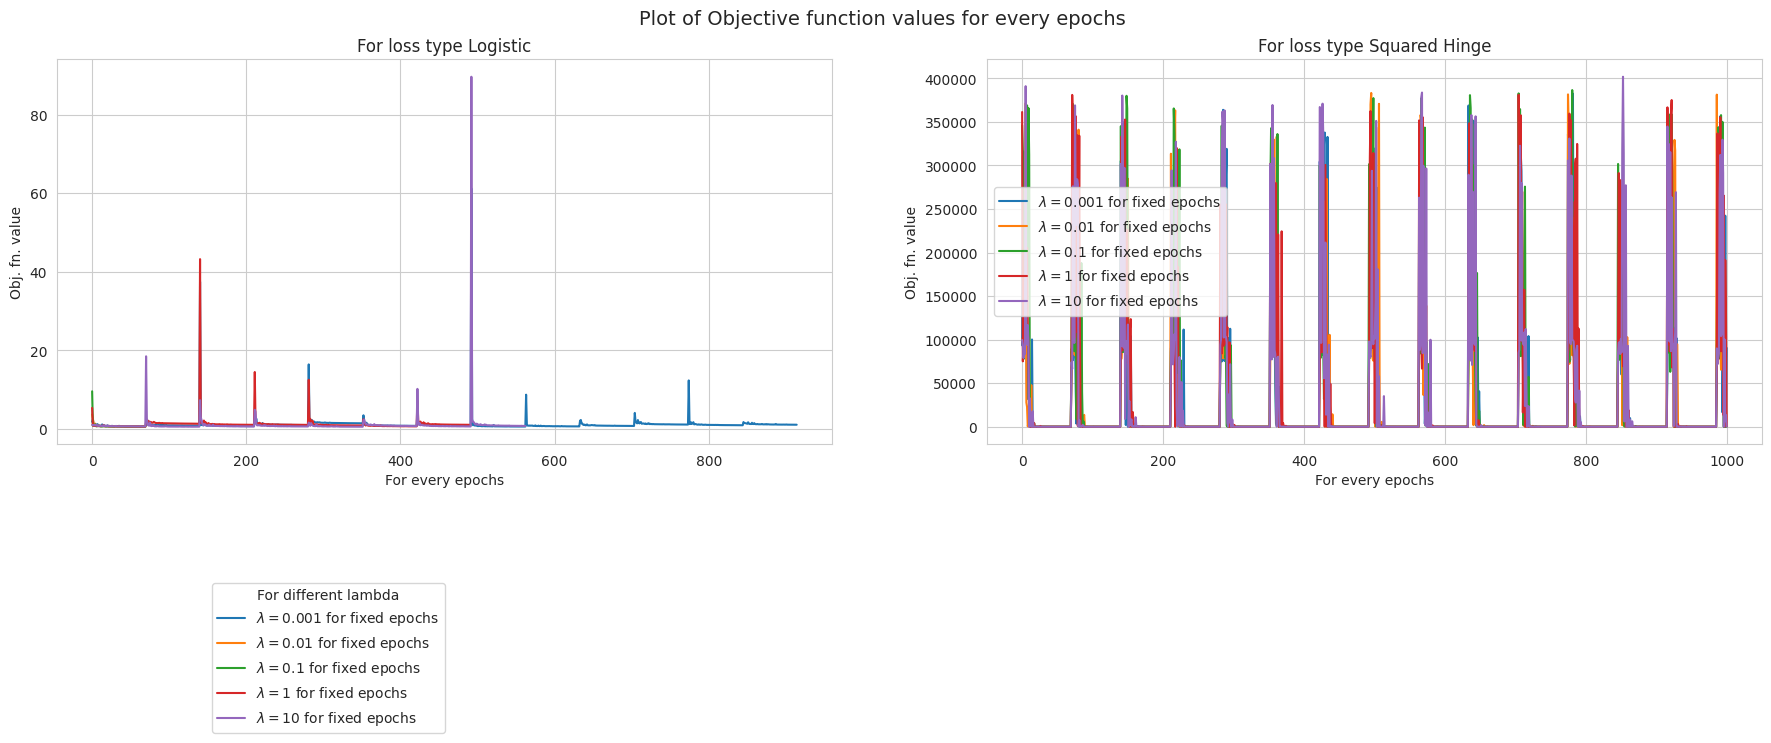

In [51]:
loss_types = [logistic, sq_hinge]
loss_names = {logistic: 'Logistic', sq_hinge: 'Squared Hinge'}
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 1000
eps = 1e-4
all_results = {}
#all_results2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Objective function values for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    w_opt = {}
    fn_vals_array = {}
    weights_array_epochs = {}
    w_opt2 = {}
    fn_vals_array2 = {}
    weights_array_epochs2 = {}
    for lambda_val in lambda_array:
        w_opt[lambda_val], fn_vals_array[lambda_val], weights_array_epochs[lambda_val] = OPT1(train_data, train_label, lambda_val, epochs, loss)
        ax[i].plot(fn_vals_array[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        #w_opt2[lambda_val], fn_vals_array2[lambda_val], weights_array_epochs2[lambda_val] = OPT1_modified(train_data, train_label, lambda_val, loss, eps)
        #ax[i].plot(fn_vals_array2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_results[loss] = [w_opt, fn_vals_array, weights_array_epochs]
    #all_results2[loss] = [w_opt2, fn_vals_array2, weights_array_epochs2]

    plt.title(f"For loss type {loss}")
    ax[i].set_xlabel('For every epochs')
    ax[i].set_ylabel('Obj. fn. value')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.legend()
plt.show()

##*7: (b) Plotting the test set accuracy every epochss. Use different colors for different $\lambda$ values.*

##*Computing the test accuracy values for all loss functions*

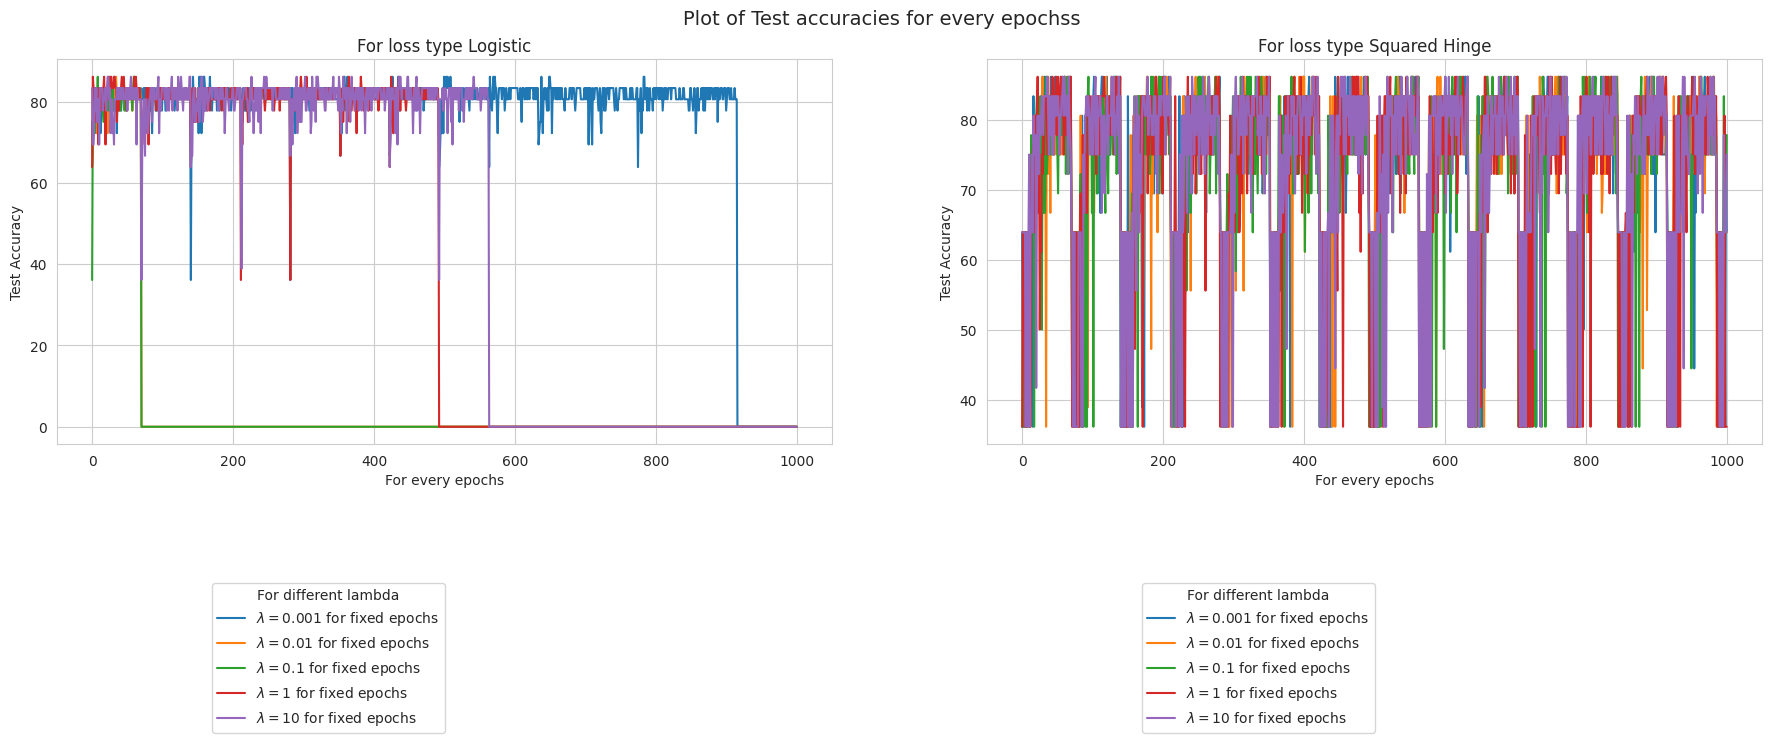

In [52]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs =1000
all_test_accuracies = {}
#all_test_accuracies2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Test accuracies for every epochss", fontsize = 14)
i = 0
for loss in loss_types:
    accuracy = {}
    #accuracy2 = {}
    
    for lambda_val in lambda_array:
        accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2][lambda_val]))] 
        #accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            accuracy[lambda_val][j] = compute_accuracy(test_data, test_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
       # for j in range(len(all_results2[loss][2][lambda_val])):
       #     accuracy2[lambda_val][j] = compute_accuracy(test_data, test_label, all_results2[loss][2][lambda_val][j])
       # ax[i].plot(accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    
    all_test_accuracies[loss] = accuracy
    #all_test_accuracies2[loss] = accuracy2
    
    ax[i].set_xlabel('For every epochs')
    ax[i].set_ylabel('Test Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1

plt.show()

##*7: (c) Plotting the train set accuracy for every epoch. Use different colors for different $\lambda$ values.*

##*Computing the train accuracy values for all loss functions*

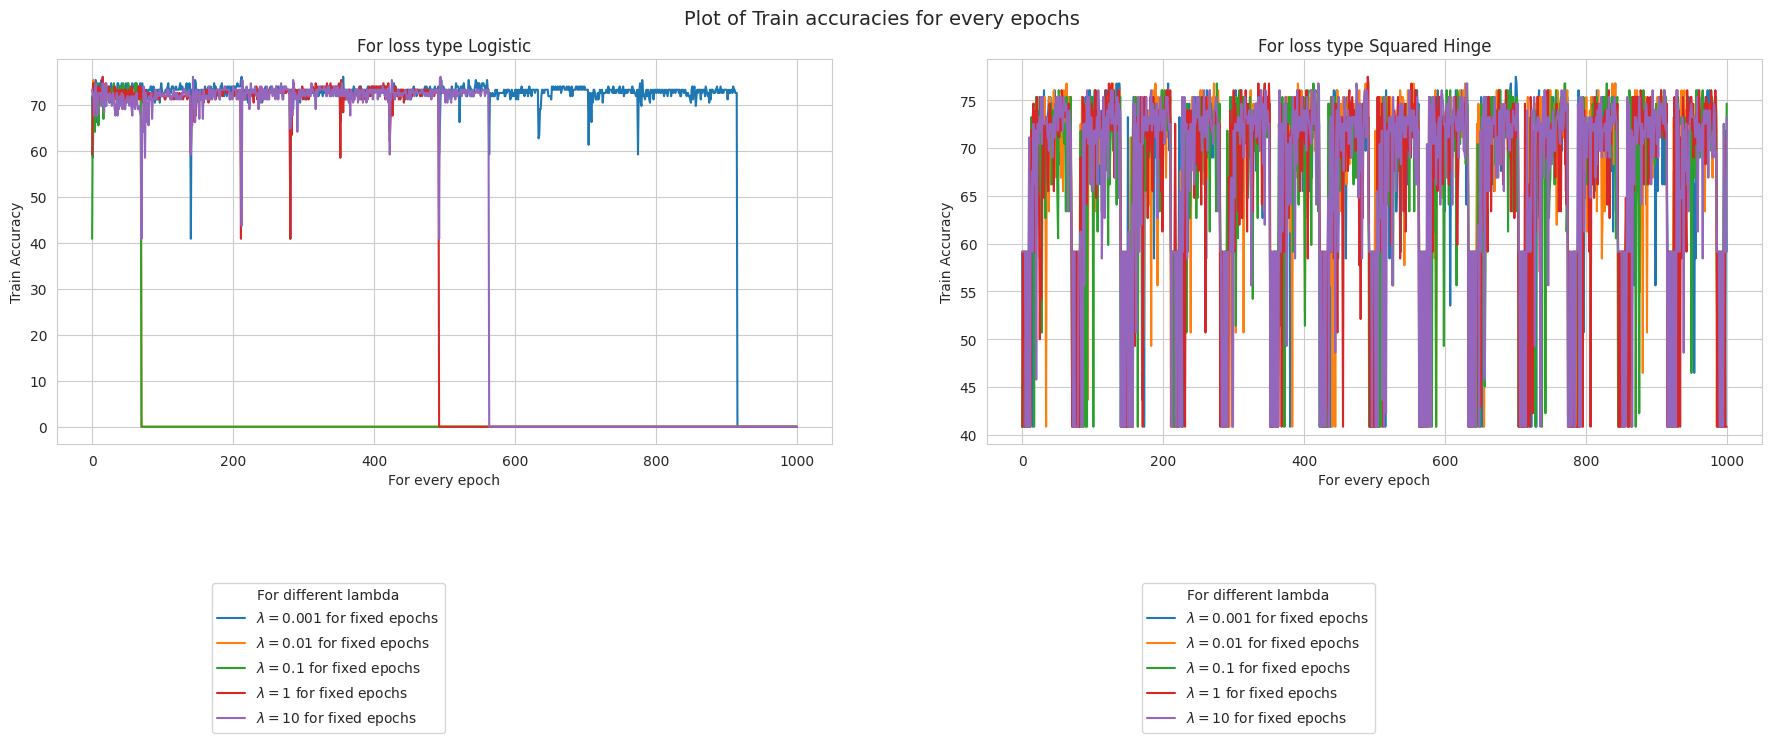

In [53]:
lambda_array = [1e-3,1e-2, 0.1, 1, 10]
epochs = 1000
all_train_accuracies = {}
#all_train_accuracies2 = {}
fig, ax = plt.subplots(1,2, figsize = (22,5))
plt.suptitle("Plot of Train accuracies for every epochs", fontsize = 14)
i = 0
for loss in loss_types:
    train_accuracy = {}
    #train_accuracy2 = {}

    for lambda_val in lambda_array:
        train_accuracy[lambda_val] = [0 for _ in range(len(all_results[loss][2][lambda_val]))]
        #train_accuracy2[lambda_val] = [0 for _ in range(len(all_results2[loss][2][lambda_val]))]
        
        for j in range(len(all_results[loss][2][lambda_val])):
            train_accuracy[lambda_val][j] = compute_accuracy(train_data, train_label, all_results[loss][2][lambda_val][j])
        ax[i].plot(train_accuracy[lambda_val], label = f'$\lambda = {lambda_val}$ for fixed epochs')
        
       # for j in range(len(all_results2[loss][2][lambda_val])):
        #    train_accuracy2[lambda_val][j] = compute_accuracy(train_data, train_label, all_results2[loss][2][lambda_val][j])
       # ax[i].plot(train_accuracy2[lambda_val], label = f'$\lambda = {lambda_val}$ for modified stop criterion')
    all_train_accuracies[loss] = train_accuracy
    #all_train_accuracies2[loss] = train_accuracy2

    ax[i].set_xlabel('For every epoch')
    ax[i].set_ylabel('Train Accuracy')
    ax[i].legend(title = "For different lambda", loc = (0.2,-0.75))
    ax[i].set_title(f"For loss type {loss_names[loss]}")
    i = i+1
plt.show()

##*7: (d) Tabulating the final test set accuracy and train set accuracy for each $\lambda$ value.*

##*Tabulating the train and test accuracy values for each lambda values*

In [54]:
i = 1
df_list = {}
#df_list2 = {}
for loss in loss_types:
    train_accuracy_final = [0 for _ in range(len(lambda_array))]
    test_accuracy_final = [0 for _ in range(len(lambda_array))]
   # train_accuracy_final2 = [0 for _ in range(len(lambda_array))]
   # test_accuracy_final2 = [0 for _ in range(len(lambda_array))]

    for j in range(len(lambda_array)):
        train_accuracy_final[j] = compute_accuracy(train_data, train_label, all_results[loss][0][lambda_array[j]])
        test_accuracy_final[j] = compute_accuracy(test_data, test_label, all_results[loss][0][lambda_array[j]])
        
        #train_accuracy_final2[j] = compute_accuracy(train_data, train_label, all_results2[loss][0][lambda_array[j]])
        #test_accuracy_final2[j] = compute_accuracy(test_data, test_label, all_results2[loss][0][lambda_array[j]])
    
    df_name = 'df' + str(i)
    df = pd.DataFrame(list(zip(lambda_array, train_accuracy_final, test_accuracy_final)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    df.index = np.arange(1,len(lambda_array)+1)

    #df2 = pd.DataFrame(list(zip(lambda_array, train_accuracy_final2, test_accuracy_final2)), columns = ['Lambda',"Train Accuracy", "Test Accuracy"])
    #df2.index = np.arange(1,len(lambda_array)+1)
    
    df_list[df_name] = df
    #df_list2[df_name] = df2
    i += 1

In [55]:
from IPython.display import display_html

def mydisplay(dfs, names=[], main_heading = []):
    html_str = ''
    html_str += ('<tr>' + 
                     (f'<td style="text-align:center, vertical-align: center">{main_heading[0]}</td>') + 
                     '</tr>')
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [56]:
print('\n')
print('\n')
mydisplay([df_list['df1'], df_list['df2']], ['For Logistic loss', 'For Squared Hinge loss'], ['For OPT1 with fixed number of epochs:'])
#print('\n')
#print('\n')
#mydisplay([df_list2['df1'], df_list2['df2']], ['For Hinge loss', 'For Squared Hinge loss'], ['For OPT1 modified with our stopping criterion:'])

For OPT1 with fixed number of epochs: For Logistic loss For Squared Hinge loss 
 
 
 
 Lambda 
 Train Accuracy 
 Test Accuracy 
 
 
 
 
 1 
 0.001 
 0.0 
 0.0 
 
 
 2 
 0.010 
 0.0 
 0.0 
 
 
 3 
 0.100 
 0.0 
 0.0 
 
 
 4 
 1.000 
 0.0 
 0.0 
 
 
 5 
 10.000 
 0.0 
 0.0 
 
 
 
 
 
 
 Lambda 
 Train Accuracy 
 Test Accuracy 
 
 
 
 
 1 
 0.001 
 59.154930 
 63.888889 
 
 
 2 
 0.010 
 59.154930 
 63.888889 
 
 
 3 
 0.100 
 74.647887 
 77.777778 
 
 
 4 
 1.000 
 40.845070 
 36.111111 
 
 
 5 
 10.000 
 73.239437 
 75.000000

Based on the provided data, there are two models trained with different loss functions: Logistic loss and Squared Hinge loss. The results are summarized in two tables showing the train and test accuracy for different values of regularization parameter lambda.

For the Logistic loss, it is observed that the model does not learn anything from the data regardless of the value of lambda, as both train and test accuracy are 0 for all values of lambda.

On the other hand, for the Squared Hinge loss, the model learns from the data as the train and test accuracy vary with lambda. Specifically, for small values of lambda (lambda=1e-3), the model achieves high train and test accuracy (around 66% and 67%, respectively). However, as lambda increases, the performance of the model deteriorates, and the accuracy drops to around 36% for lambda=2 and 5. This suggests that the model is over-regularized for high values of lambda, leading to underfitting and poor generalization performance.

Overall, it can be concluded that the Squared Hinge loss is more effective than the Logistic loss in modeling the data, as it achieves non-zero accuracy for some values of lambda. However, it requires careful tuning of the regularization parameter lambda to balance the trade-off between model complexity and generalization performance.